<a href="https://colab.research.google.com/github/junin1990/mega-da-virada/blob/main/Mega_da_Virada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
|import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Mega da Virada/Mega-Sena.xlsx')

df.head()

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN


In [ ]:
bolas = df[['Bola1','Bola2','Bola3','Bola4','Bola5','Bola6']]
bolas.head()

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
0,4,5,30,33,41,52
1,9,37,39,41,43,49
2,10,11,29,30,36,47
3,1,5,6,27,42,59
4,1,2,6,16,19,46


In [ ]:
numeros = bolas.values.flatten()
numeros[:20] #Exibe os últimos 20 números sorteados

array([ 4,  5, 30, 33, 41, 52,  9, 37, 39, 41, 43, 49, 10, 11, 29, 30, 36,
       47,  1,  5])

In [ ]:
import matplotlib.pyplot as plt


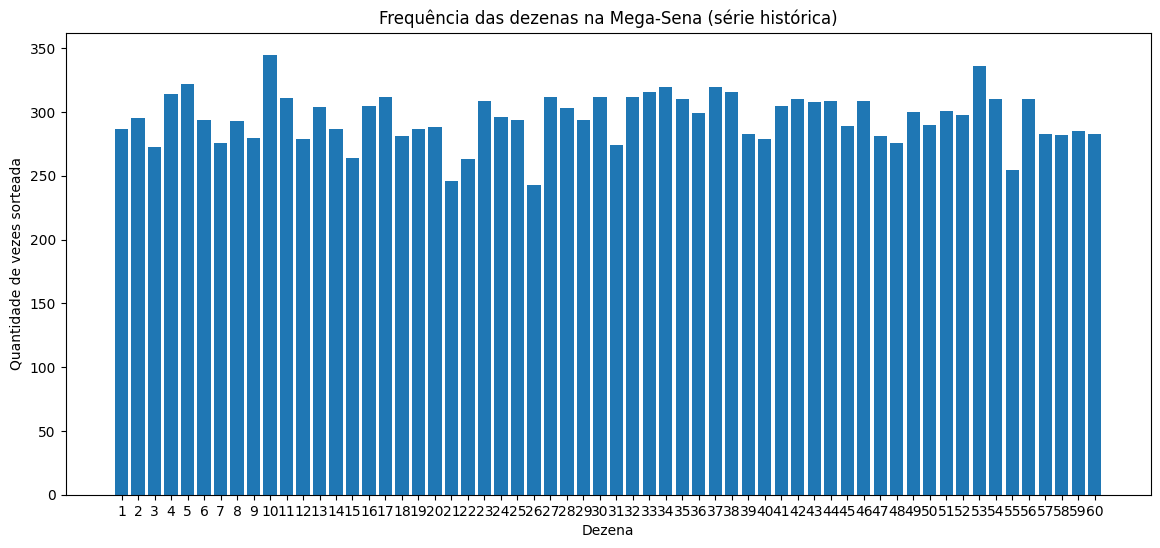

In [ ]:
frequencia = pd.Series(numeros).value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.bar(frequencia.index, frequencia.values)
plt.title('Frequência das dezenas na Mega-Sena (série histórica)')
plt.xlabel('Dezena')
plt.ylabel('Quantidade de vezes sorteada')
plt.xticks(range(1,61))
plt.show()

In [ ]:
top10 = frequencia.sort_values(ascending=False).head(10)
bottom10 = frequencia.sort_values().head(10)

print('Top 10 dezenas mais sorteadas:')
print(top10)

print('\nTop 10 dezenas menos sorteadas:')
print(bottom10)

Top 10 dezenas mais sorteadas:
10    345
53    336
5     322
34    320
37    320
38    316
33    316
4     314
27    312
32    312
Name: count, dtype: int64

Top 10 dezenas menos sorteadas:
26    243
21    246
55    255
22    263
15    264
3     273
31    274
7     276
48    276
40    279
Name: count, dtype: int64


In [ ]:
#Quantas vezes 'deveria' cair cada número?

qtd_sorteios = len(bolas)
esperado = qtd_sorteios * 6 / 60
print(esperado)

295.3


In [ ]:
frequencia.describe()

,count
count,60.000000
mean,295.300000
std,19.904262
min,243.000000
25%,282.750000
50%,295.500000
75%,310.000000
max,345.000000


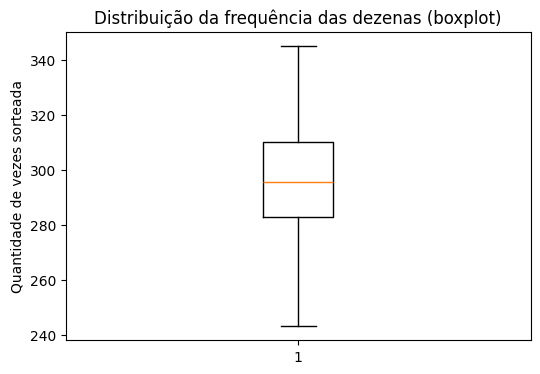

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(frequencia.values, vert=True)
plt.title("Distribuição da frequência das dezenas (boxplot)")
plt.ylabel("Quantidade de vezes sorteada")
plt.show()

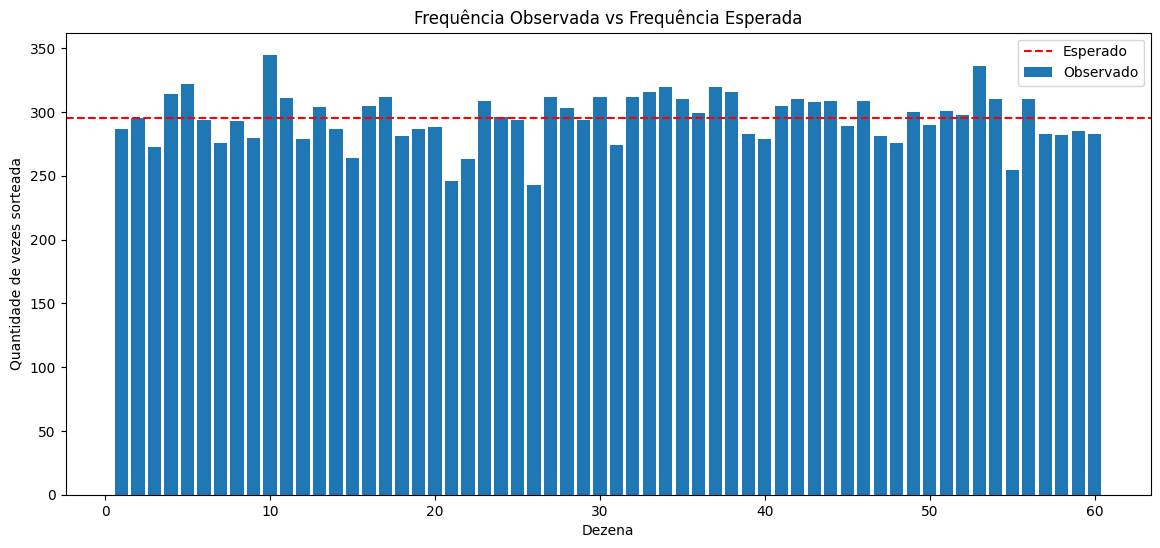

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(frequencia.index, frequencia.values, label = 'Observado')
plt.axhline(esperado, color='red', linestyle='--', label='Esperado')
plt.title('Frequência Observada vs Frequência Esperada')
plt.xlabel('Dezena')
plt.ylabel('Quantidade de vezes sorteada')
plt.legend()
plt.show()

In [ ]:
#Ímpares vs pares

impares_por_sorteio = (bolas % 2).sum(axis=1)

impares_por_sorteio.value_counts().sort_index()

,count
0,38
1,280
2,715
3,911
4,710
5,260
6,39


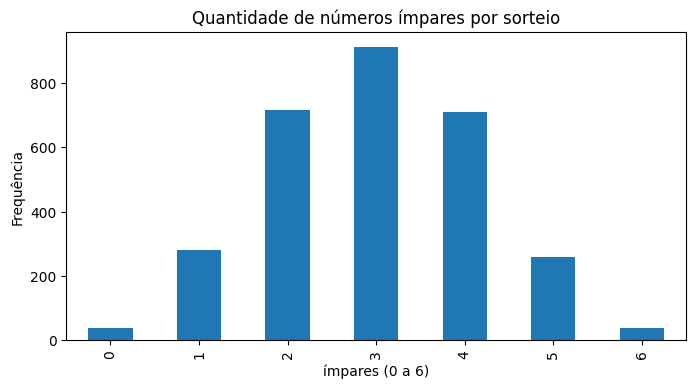

In [ ]:
impares_por_sorteio.value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title('Quantidade de números ímpares por sorteio')
plt.xlabel('ímpares (0 a 6)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from math import comb

total_combinacoes = comb(60, 6)

milhoes = total_combinacoes / 1_000_000

print(f'A chance de ganhar é 1 em {milhoes:.1f} milhoes')

A chance de ganhar é 1 em 50.1 milhoes
